## Odds are....

My classification tree models were not successful in being able to predict if a wine would be priced >$100, so I'm going to build logistic regression model in hopes of improving the results. Logistic models are ideal for single-class classification problems, such as the one I'm trying to solve. The advantages of these models are that they are robust, as they do not assume linear relationships or normal distributions, and intuitive as we can inspect and interpret the coefficients of the prediction variables. While decision trees are also suitable for classification tasks, their growth can result in overfitting, which is not as great of a concern with logistic models.

With that in mind, let's move on to the modeling...



In [1]:
#Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
%matplotlib inline

cab_df2 = pd.read_csv('./cablist4.csv')
cab_df2['intercept'] = 1.0

In [2]:
#create a new target variable based on price
#$100 seems like a lot to spend on a bottle of wine, so that will be my threshold

cab_df2['HighPrice_Ind'] = cab_df2['PriceRetail'].apply(lambda x: 1 if x >= 100.00 else 0)

In [3]:
features = ['Vintage', 'RatingScore', 'UnqWordInd', 'Attribute_94+ Rated Wine', \
            'Attribute_Boutique Wines', 'Attribute_Business Gifts',\
            'Attribute_Collectible Wines', 'Attribute_Earthy &amp; Spicy', 'Attribute_Great Bottles to Give',\
            'Attribute_Green Wines', 'Attribute_Kosher Wines', 'Attribute_Older Vintages', \
            'Attribute_Private Cellar List', 'Attribute_Rich &amp; Creamy', 'Attribute_Screw Cap Wines', \
            'Attribute_Smooth &amp; Supple', 'Region_California', 'Region_Italy', 'Region_South Africa',\
            'Region_South America', 'Region_Spain', 'Region_Washington']
target = ['HighPrice_Ind']

### Feature Selection

I have 22 features, and these should be cut back to retain those with the best predictive power. I'm going to look at the correlations between the features and the high priced indicator before selecting the top 25% of features to build the model

In [4]:
cab_df2.corr()['HighPrice_Ind'].sort_values()

Vintage                           -0.274361
Region_South America              -0.207638
Attribute_Smooth &amp; Supple     -0.195858
Attribute_Big &amp; Bold          -0.159230
Attribute_Screw Cap Wines         -0.110534
Attribute_Earthy &amp; Spicy      -0.098099
Attribute_Green Wines             -0.074673
Region_Washington                 -0.072727
Region_South Africa               -0.066131
Region_Italy                      -0.055830
Region_Israel                     -0.028772
Attribute_Kosher Wines            -0.028772
Region_Spain                      -0.020343
Attribute_Private Cellar List     -0.020338
Attribute_94+ Rated Wine          -0.014378
Attribute_Rich &amp; Creamy       -0.014378
Attribute_Business Gifts           0.007796
Id                                 0.012605
Attribute_Older Vintages           0.012764
Attribute_Great Bottles to Give    0.035930
Attribute_Boutique Wines           0.114415
UnqWordInd                         0.203664
Region_California               

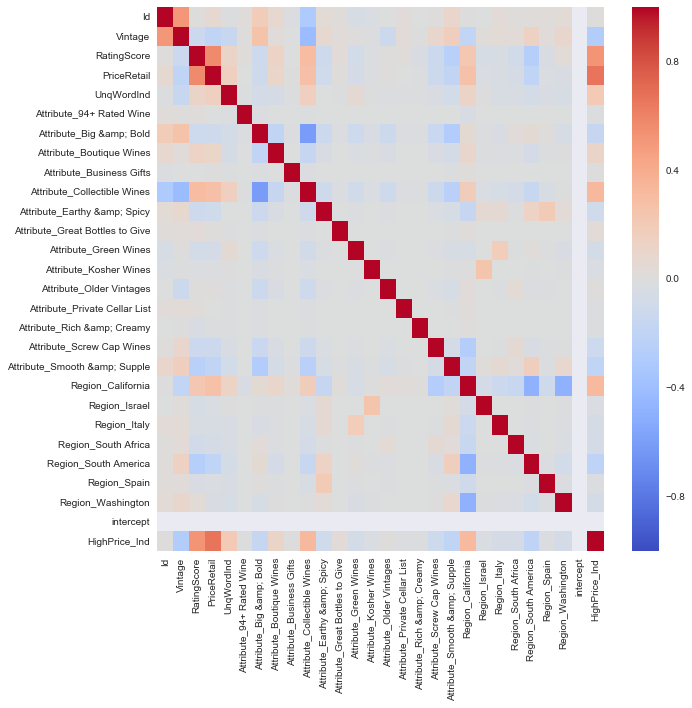

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cab_df2.corr(), cmap='coolwarm')

In [6]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

X = cab_df2[features]
y = cab_df2.HighPrice_Ind.values

selector = SelectPercentile(percentile=25)
selector.fit(X,y)

idxs_selected = selector.get_support(indices=True)

new_feats = []
for i in idxs_selected:
    new_feats.append(features[i])
    
new_feats.append('intercept')
new_feats



['Vintage',
 'RatingScore',
 'UnqWordInd',
 'Attribute_Collectible Wines',
 'Region_California',
 'Region_South America',
 'intercept']

### Model Building
Now that I have restricted the features, I'm going to build the Logistic Regression model. I'll start off by running the model in statsmodels, as I want to inspect the coefficients for stability.

In [7]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


features =  new_feats

x = cab_df2[features]
y = cab_df2[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=39)

logit = sm.Logit(y_train, x_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.425330
         Iterations 9


/Users/gregorybronn/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:          HighPrice_Ind   No. Observations:                 1835
Model:                          Logit   Df Residuals:                     1828
Method:                           MLE   Df Model:                            6
Date:                Wed, 04 Apr 2018   Pseudo R-squ.:                  0.3443
Time:                        14:15:49   Log-Likelihood:                -780.48
converged:                       True   LL-Null:                       -1190.4
                                        LLR p-value:                8.204e-174
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Vintage                        -0.0811      0.013     -6.313      0.000      -0.106      -0.056
RatingScore                     0.5698      0.034     16.601      0.000       0.

### Revising the features

In the above output, the **Region_South America** variable looks problematic. It's 95% confidence interval includes 0, which isn't ideal for model stability. Because of this, I'm going to remove it from the features, and rerun the model.  

In [9]:
new_feats.remove('Region_South America')
new_feats

['Vintage',
 'RatingScore',
 'UnqWordInd',
 'Attribute_Collectible Wines',
 'Region_California',
 'intercept']

In [10]:
features =  new_feats

x = cab_df2[features]
y = cab_df2[target]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=39)

logit = sm.Logit(y_train, x_train)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.426334
         Iterations 7


In [11]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:          HighPrice_Ind   No. Observations:                 1835
Model:                          Logit   Df Residuals:                     1829
Method:                           MLE   Df Model:                            5
Date:                Wed, 04 Apr 2018   Pseudo R-squ.:                  0.3428
Time:                        14:16:05   Log-Likelihood:                -782.32
converged:                       True   LL-Null:                       -1190.4
                                        LLR p-value:                3.815e-174
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Vintage                        -0.0815      0.013     -6.332      0.000      -0.107      -0.056
RatingScore                     0.5772      0.034     16.881      0.000       0.

### Looks better! Time to review some of the important key statistics from the model

In [12]:
print result.conf_int()

                                     0           1
Vintage                      -0.106729   -0.056272
RatingScore                   0.510168    0.644198
UnqWordInd                    0.545655    1.121334
Attribute_Collectible Wines   0.261078    0.795676
Region_California             1.500232    2.331968
intercept                    57.056814  156.689005


In [13]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                                     2.5%         97.5%            OR
Vintage                      8.987695e-01  9.452824e-01  9.217326e-01
RatingScore                  1.665571e+00  1.904459e+00  1.781014e+00
UnqWordInd                   1.725738e+00  3.068945e+00  2.301346e+00
Attribute_Collectible Wines  1.298329e+00  2.215938e+00  1.696177e+00
Region_California            4.482731e+00  1.029818e+01  6.794408e+00
intercept                    6.018098e+24  1.119877e+68  2.596060e+46


### Switching back to SK Learn to build and run validations

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

x = cab_df2[new_feats]
y = cab_df2.HighPrice_Ind.values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=39)

model = LogisticRegression(C=1)
model.fit(x_train, y_train)
    
y_pred = model.predict(x_test)

In [15]:
coef_df = pd.DataFrame(zip(x.columns, model.coef_[0]))
coef_df.columns = ['predictor', 'coefficient_value']
sorted_coef = coef_df.sort_values(['coefficient_value', 'predictor'], ascending=[0, 1])
sorted_coef

,predictor,coefficient_value
4,Region_California,1.869588
2,UnqWordInd,0.843831
3,Attribute_Collectible Wines,0.720872
1,RatingScore,0.567655
5,intercept,0.017458
0,Vintage,-0.027797


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("Train Testing Results \n\n")

print(classification_report(y_test, y_pred,
                         target_names=['not high priced', 'high priced']))

print('Confusion Matrix is:')
cm

Train Testing Results 


                 precision    recall  f1-score   support

not high priced       0.81      0.87      0.83       560
    high priced       0.75      0.66      0.70       344

    avg / total       0.79      0.79      0.78       904

Confusion Matrix is:


array([[485,  75],
       [117, 227]])

In [17]:
from sklearn.model_selection import cross_val_score
recall_scores = cross_val_score(model, x, y, cv=10, scoring='recall')
accuracy_scores = cross_val_score(model, x, y, cv=10, scoring='accuracy')
print "Recall Score Summary:"
print recall_scores
print recall_scores.mean()

print "Accuracy Score Summary:"
print accuracy_scores
print accuracy_scores.mean()

Recall Score Summary:
[ 1.          0.98989899  0.92929293  0.86868687  0.88888889  0.68686869
  0.64646465  0.21212121  0.11111111  0.02020202]
0.635353535354
Accuracy Score Summary:
[ 0.49635036  0.73357664  0.81751825  0.87591241  0.95255474  0.85766423
  0.86131387  0.71532847  0.67883212  0.64468864]
0.763373973958


In [18]:
proba_cab = model.predict_proba(x_test)

print proba_cab[:5]

[[ 0.71609577  0.28390423]
 [ 0.99187156  0.00812844]
 [ 0.43413405  0.56586595]
 [ 0.24544313  0.75455687]
 [ 0.99187156  0.00812844]]


In [19]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(y3_test, proba_cab, this_label):
    fpr, tpr, thresholds = roc_curve(y_test, proba_cab[:, 1])
    
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.plot(fpr, tpr, label= this_label + ', ROC Area = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('ROC')
    plt.legend(loc="lower right")

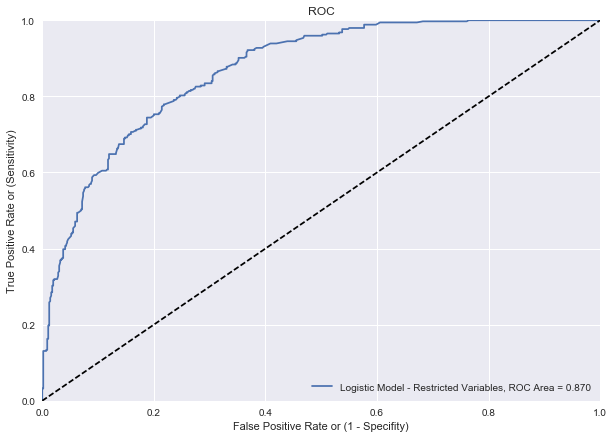

In [20]:
fig, ax = plt.subplots(figsize=(10,7))
plot_roc_curve(y_test, proba_cab, 'Logistic Model - Restricted Variables')

### Success! 🍷

This model does a good job of predicting whether or not a wine will have a price > $100. The cross-validation shows stable scores and the AUC shows that the model is much better than a random guess. Time for me to have a glass of wine!